## Regresión Lineal Simple - Multiple - Correlación

Considere el archivo abalone.txt que contiene información sobre distintas muestras de abalones. Los atributos estan separados por coma, con los siguientes campos:

* **Sexo** (categórica): M (masculino), F (femenino) o I (infante).
* **Longitud** (continua), en milímetros.
* **Diámetro** (continua), en milímetros.
* **Altura** (continua), en milímetros.
* **Peso completo del abalone** (continua), en gramos.
* **Peso de la carne** (continua), en gramos.
* **Peso de las vísceras** (continua), en gramos.
* **Peso del caparazón** (continua), en gramos.
* **Anillos** (entera).

**a.** Plantear un modelo de **regresión lineal simple** para predecir el diámetro en función de la longitud.

**b.** Observe que el conjunto de datos tiene información del peso total de cada especimen junto con un desagregado por partes. Ajustar un **modelo de regresión multiple** que explique el peso total en función del peso del caparazón, las vísceras y la carne.

**c.** Se trata ahora de establecer una **relación entre el peso total y el diámetro del especimen.**
Empezar dibujando en un **scatter plot** ambas variables. Si definimos como P al peso total y D al diámetro, se consideran los siguientes modelos:

* **Modelo lineal simple**, **$P$** = b + a$\cdot$**$D$** + $\epsilon$.
* **Modelo cuadratico**, **$P$** = c + b$\cdot$**$D$** + a **$D^2$** + $\epsilon$.
* **Modelo cubico sin términos de orden inferior**, **$P$** = a$\cdot$**$D^3$** + $\epsilon$.

Efectuar en cada caso una regresion y graficar las curvas superpuestas sobre el scatter plot.

### **a. Plantear un modelo de regresión lineal simple para predecir el diámetro en función de la longitud.**

In [1]:
datos_abalones <- read.csv(file = "abalone.txt", header = FALSE)
colnames(datos_abalones) <- c("Sexo","Longitud","Diametro","Altura","Peso_completo","Peso_carne","Peso_viscera",
                    "Peso_caparazon","Anillos")

Visualizo las primeras filas del data frame con el que estaremos trabajando:

In [2]:
head(datos_abalones)

,Sexo,Longitud,Diametro,Altura,Peso_completo,Peso_carne,Peso_viscera,Peso_caparazon,Anillos
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Planteo el modelo de regresion lineal simple y el gráfico pedidos:

In [3]:
modelo_diametro_longitud = lm(Diametro ~ Longitud, data = datos_abalones)
summary(modelo_diametro_longitud)


Call:
lm(formula = Diametro ~ Longitud, data = datos_abalones)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113017 -0.008703 -0.000549  0.008678  0.243553 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.019414   0.001113  -17.44   <2e-16 ***
Longitud     0.815461   0.002070  393.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01607 on 4175 degrees of freedom
Multiple R-squared:  0.9738,	Adjusted R-squared:  0.9738 
F-statistic: 1.552e+05 on 1 and 4175 DF,  p-value: < 2.2e-16


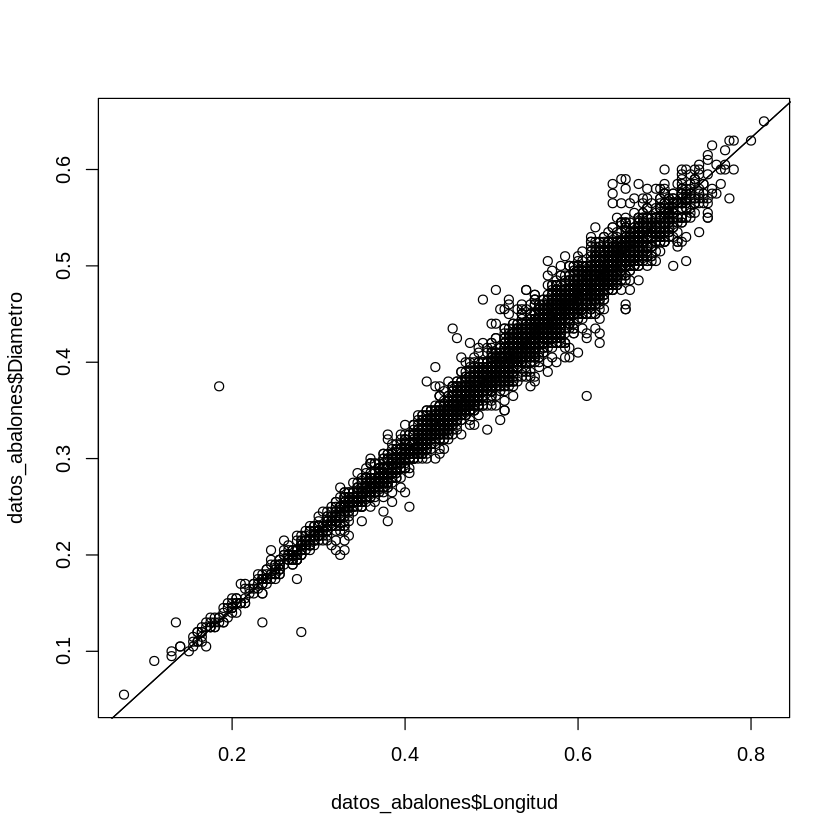

In [4]:
plot(datos_abalones$Longitud, datos_abalones$Diametro)
t <- seq(0,0.9,0.01)
recta<- -0.019414 + 0.815461 * t
points(t,recta, type = "l", ylim = c(0,0.6))
lines(t,recta, type = "l", ylim = c(0,0.6))
p <- recordPlot()

### **b. Ajustar un modelo de regresión multiple que explique el peso total en función del peso del caparazón, las vísceras y la carne.**

In [5]:
modelo_peso = lm(Peso_completo ~ (Peso_carne + Peso_viscera + Peso_caparazon), data = datos_abalones)

In [6]:
summary(modelo_peso)


Call:
lm(formula = Peso_completo ~ (Peso_carne + Peso_viscera + Peso_caparazon), 
    data = datos_abalones)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54690 -0.01708 -0.00195  0.00903  0.51721 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.007830   0.001452  -5.393 7.32e-08 ***
Peso_carne      0.936560   0.009294 100.770  < 2e-16 ***
Peso_viscera    1.111650   0.021079  52.737  < 2e-16 ***
Peso_caparazon  1.252962   0.012802  97.876  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0469 on 4173 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9909 
F-statistic: 1.508e+05 on 3 and 4173 DF,  p-value: < 2.2e-16


### c. Se trata ahora de establecer una relación entre el peso total y el diámetro del especimen. Empezar dibujando en un scatter plot ambas variables. 

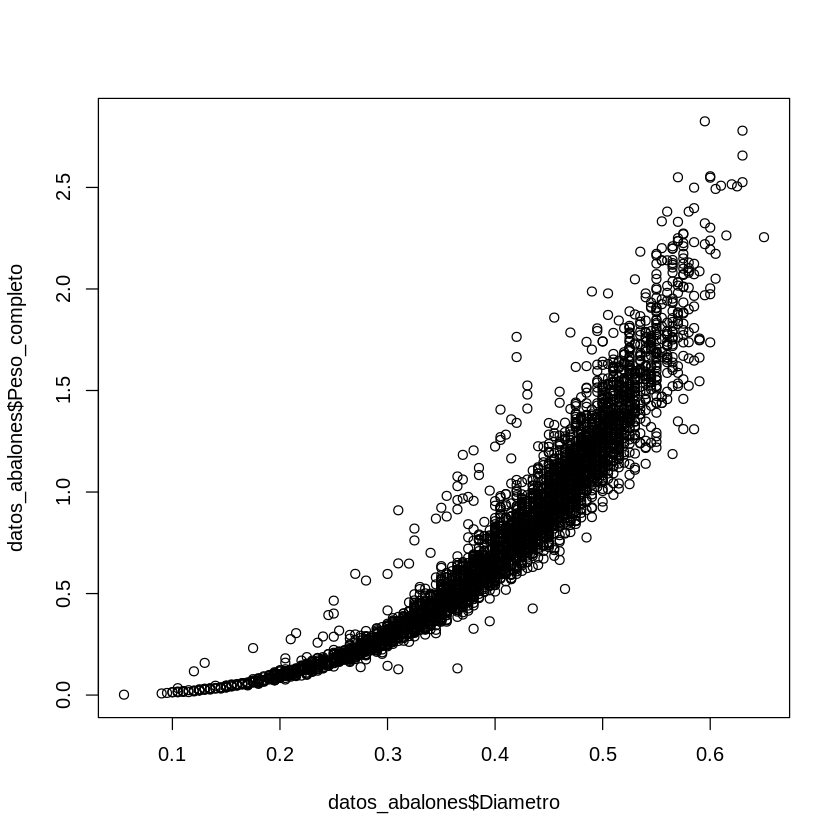

In [7]:
plot(datos_abalones$Diametro, datos_abalones$Peso_completo)
p <- recordPlot()

#### Si definimos como P al peso total y D al diámetro, se consideran los siguientes modelos:

#### Modelo lineal simple,  𝑃  = b + a ⋅  𝐷  +  𝜖 .
#### Modelo cuadratico,  𝑃  = c + b ⋅  𝐷  + a  𝐷2  +  𝜖 .
#### Modelo cubico sin términos de orden inferior,  𝑃  = a ⋅  𝐷3  +  𝜖 .

#### Efectuar en cada caso una regresion y graficar las curvas superpuestas sobre el scatter plot.

In [8]:
modelo_lineal = lm(Peso_completo ~ Diametro,  data = datos_abalones)
modelo_cuadratico = lm(Peso_completo ~ Diametro + I(Diametro^2), data = datos_abalones)
modelo_cubico_simple = lm(Peso_completo ~ I(Diametro^3), data = datos_abalones)

In [9]:
print(modelo_lineal)
print(modelo_cuadratico)
print(modelo_cubico_simple)


Call:
lm(formula = Peso_completo ~ Diametro, data = datos_abalones)

Coefficients:
(Intercept)     Diametro  
     -1.037        4.573  


Call:
lm(formula = Peso_completo ~ Diametro + I(Diametro^2), data = datos_abalones)

Coefficients:
  (Intercept)       Diametro  I(Diametro^2)  
       0.3477        -3.3555        10.4968  


Call:
lm(formula = Peso_completo ~ I(Diametro^3), data = datos_abalones)

Coefficients:
  (Intercept)  I(Diametro^3)  
      0.03393       10.02141  



In [10]:
t <- seq(0,1,0.01)

In [11]:
Y_lineal = -1.037 + 4.573 * t
Y_cuadratico = 0.3477 - 3.355 * t + 10.4968 - t^2
Y_cubico_simple = 0.03393 + 10.02141 * t^3

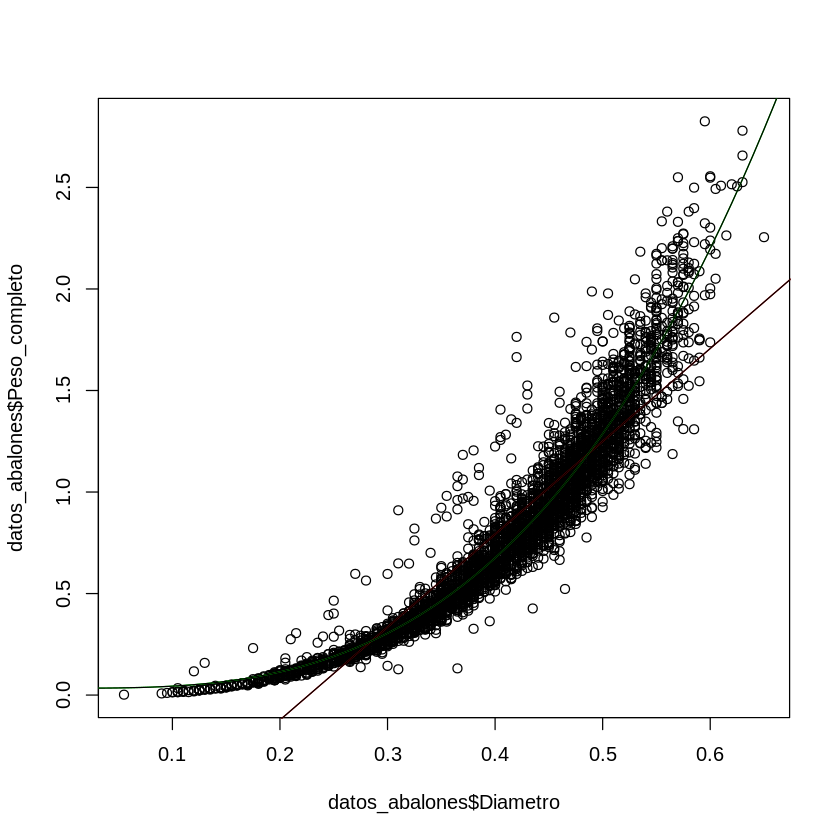

In [12]:
replayPlot(p)

points(t,Y_lineal, type = "l", ylim = c(0,3), col = 'red')
lines(t,Y_lineal, type = "l", ylim = c(0,3))

points(t,Y_cuadratico, type = "l", ylim = c(0,3), col = 'blue')
lines(t,Y_cuadratico, type = "l", ylim = c(0,3))

points(t,Y_cubico_simple, type = "l", ylim = c(0,3), col = 'green')
lines(t,Y_cubico_simple, type = "l", ylim = c(0,3))